# Dependency Analysis 
**Goal:** Need to analyze why a question is categorized as useful and which part of the text in the intervention influences this decision.

**What you want to find out:**
- What linguistic structures (words, phrases, dependencies) contribute to useful questions?
- Are there common patterns across different interventions that lead to useful/unhelpful/invalid questions?
- Where in the intervention text do these questions originate from


## Load the json and extract features

In [2]:
import spacy
import json
import pandas as pd

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Load dataset
file_path = "validation.json"  # Update with the correct file path

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Prepare lists to store processed data
preprocessed_data = []

# Function to extract linguistic features
def process_text(text):
    doc = nlp(text)

    # Tokenization
    tokens = [token.text for token in doc]

    # POS Tagging
    pos_tags = [(token.text, token.pos_) for token in doc]

    # Named Entity Recognition (NER)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Dependency Parsing
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]

    # Length features
    word_count = len(tokens)
    char_count = len(text)

    return tokens, pos_tags, named_entities, dependencies, word_count, char_count

# Process each intervention and question
for intervention_id, content in data.items():
    intervention_text = content.get("intervention", "")
    scheme_types = set(content.get("schemes", []))

    for cq in content.get("cqs", []):
        question_text = cq["cq"]
        label = cq["label"]

        # Process intervention and question
        intervention_tokens, intervention_pos, intervention_ner, intervention_dep, _, _ = process_text(intervention_text)
        question_tokens, question_pos, question_ner, question_dep, question_word_count, question_char_count = process_text(question_text)

        # Store results
        preprocessed_data.append({
            "intervention": intervention_text,
            "question": question_text,
            "label": label,
            "schemes": ", ".join(scheme_types),
            "intervention_tokens": intervention_tokens,
            "intervention_pos": intervention_pos,
            "intervention_ner": intervention_ner,
            "intervention_dependencies": intervention_dep,
            "question_tokens": question_tokens,
            "question_pos": question_pos,
            "question_ner": question_ner,
            "question_dependencies": question_dep,
            "question_word_count": question_word_count,
            "question_char_count": question_char_count
        })

# Convert to DataFrame
df_preprocessed = pd.DataFrame(preprocessed_data)



In [3]:
# Convert label to numerical values
label_mapping = {"Useful": 2, "Unhelpful": 1, "Invalid": 0}
df_preprocessed["label_numeric"] = df_preprocessed["label"].map(label_mapping)

In [4]:
df_preprocessed

,intervention,question,label,schemes,intervention_tokens,intervention_pos,intervention_ner,intervention_dependencies,question_tokens,question_pos,question_ner,question_dependencies,question_word_count,question_char_count,label_numeric
0,"CLINTON: ""which may prove to be an intelligenc...",Is the current political situation actually a ...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[Is, the, current, political, situation, actua...","[(Is, AUX), (the, DET), (current, ADJ), (polit...","[(NATO, ORG)]","[(Is, ROOT, Is), (the, det, situation), (curre...",30,188,2
1,"CLINTON: ""which may prove to be an intelligenc...",What are the potential drawbacks or risks of i...,Unhelpful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, are, the, potential, drawbacks, or, ris...","[(What, PRON), (are, AUX), (the, DET), (potent...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, are), (are, ROOT, are), (the, de...",24,146,1
2,"CLINTON: ""which may prove to be an intelligenc...",What evidence is there that Donald Trump's rhe...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, evidence, is, there, that, Donald, Trum...","[(What, DET), (evidence, NOUN), (is, AUX), (th...","[(Donald Trump's, PERSON), (Muslim, NORP), (Cl...","[(What, det, evidence), (evidence, attr, is), ...",33,186,2
3,"CLINTON: ""which may prove to be an intelligenc...","How does Clinton define ""working more closely""...",Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[How, does, Clinton, define, "", working, more,...","[(How, SCONJ), (does, AUX), (Clinton, PROPN), ...","[(Clinton, PERSON)]","[(How, advmod, define), (does, aux, define), (...",26,139,2
4,"CLINTON: ""which may prove to be an intelligenc...",What is the evidence that Muslim communities a...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, is, the, evidence, that, Muslim, commun...","[(What, PRON), (is, AUX), (the, DET), (evidenc...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, is), (is, ROOT, is), (the, det, ...",35,184,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,"CLINTON: ""let me start by saying , words matte...","How does Clinton's assertion that ""our word is...",Useful,"PositionToKnow, Example, Values","[CLINTON, :, "", let, me, start, by, saying, ,,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (le...","[(Japan, GPE), (South Korea, GPE), (America, G...","[(CLINTON, dep, let), (:, punct, CLINTON), ("",...","[How, does, Clinton, 's, assertion, that, "", o...","[(How, SCONJ), (does, VERB), (Clinton, PROPN),...","[(Clinton, PERSON), (Donald, PERSON)]","[(How, advmod, does), (does, ROOT, does), (Cli...",31,133,2
4132,"CLINTON: ""let me start by saying , words matte...",What specific words or actions by Clinton's op...,Useful,"PositionToKnow, Example, Values","[CLINTON, :, "", let, me, start, by, saying, ,,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (le...","[(Japan

### `Similarity of question and intervension`
rank_bm25: A collection of algorithms for querying a set of documents and returning the ones most relevant to the query. The most common use case for these algorithms is, as you might have guessed, to create search engines.

 BM25Okapi: bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document, regardless of their proximity within the document. 

In [5]:
from rank_bm25 import BM25Okapi

# Compute BM25 Similarity Score (Phrase Matching)
corpus = df_preprocessed["intervention"].apply(lambda x: x.split()).tolist()  # Tokenize interventions
bm25 = BM25Okapi(corpus)  # Initialize BM25 with interventions

# Apply BM25 scoring for each question
df_preprocessed["bm25_similarity"] = df_preprocessed.apply(
    lambda row: bm25.get_scores(row["question"].split())[row.name], axis=1
)

# Save the updated DataFrame with new feature
df_preprocessed.to_csv("preprocessed_dataset.csv", index=False)

# Display the first few rows of the updated DataFrame


In [6]:
df_preprocessed.head(5)

,intervention,question,label,schemes,intervention_tokens,intervention_pos,intervention_ner,intervention_dependencies,question_tokens,question_pos,question_ner,question_dependencies,question_word_count,question_char_count,label_numeric,bm25_similarity
0,"CLINTON: ""which may prove to be an intelligenc...",Is the current political situation actually a ...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[Is, the, current, political, situation, actua...","[(Is, AUX), (the, DET), (current, ADJ), (polit...","[(NATO, ORG)]","[(Is, ROOT, Is), (the, det, situation), (curre...",30,188,2,22.899070
1,"CLINTON: ""which may prove to be an intelligenc...",What are the potential drawbacks or risks of i...,Unhelpful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, are, the, potential, drawbacks, or, ris...","[(What, PRON), (are, AUX), (the, DET), (potent...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, are), (are, ROOT, are), (the, de...",24,146,1,32.650237
2,"CLINTON: ""which may prove to be an intelligenc...",What evidence is there that Donald Trump's rhe...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, evidence, is, there, that, Donald, Trum...","[(What, DET), (evidence, NOUN), (is, AUX), (th...","[(Donald Trump's, PERSON), (Muslim, NORP), (Cl...","[(What, det, evidence), (evidence, attr, is), ...",33,186,2,45.428358
3,"CLINTON: ""which may prove to be an intelligenc...","How does Clinton define ""working more closely""...",Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[How, does, Clinton, define, "", working, more,...","[(How, SCONJ), (does, AUX), (Clinton, PROPN), ...","[(Clinton, PERSON)]","[(How, advmod, define), (does, aux, define), (...",26,139,2,12.518041
4,"CLINTON: ""which may prove to be an intelligenc...",What is the evidence that Muslim communities a...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, is, the, evidence, that, Muslim, commun...","[(What, PRON), (is, AUX), (the, DET), (evidenc...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, is), (is, ROOT, is), (the, det, ...",35,184,2,28.969901


C:\Users\maria\AppData\Local\Temp\ipykernel_3196\2998682277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_classwise_correlation["Class"], y=df_classwise_correlation["Average_BM25_Similarity"], palette="coolwarm")


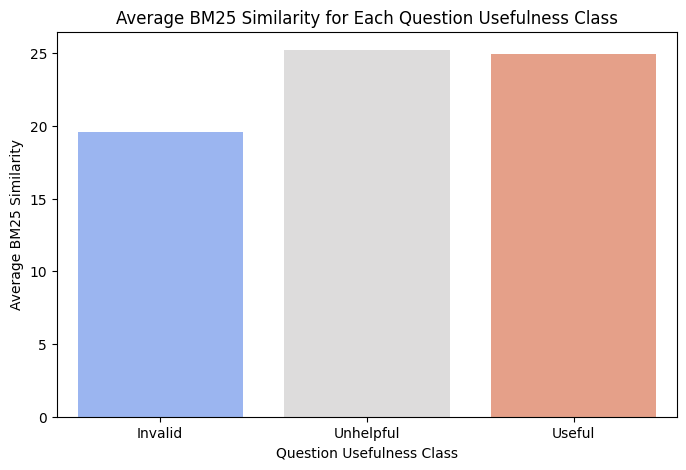

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average BM25 similarity for each class
classwise_avg_similarity = df_preprocessed.groupby("label")["bm25_similarity"].mean()

# Convert to DataFrame for visualization
df_classwise_correlation = classwise_avg_similarity.reset_index()
df_classwise_correlation.columns = ["Class", "Average_BM25_Similarity"]

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=df_classwise_correlation["Class"], y=df_classwise_correlation["Average_BM25_Similarity"], palette="coolwarm")

# Add labels and title
plt.xlabel("Question Usefulness Class")
plt.ylabel("Average BM25 Similarity")
plt.title("Average BM25 Similarity for Each Question Usefulness Class")

# Show the plot
plt.show()


✍🏻 the invalid questions will have low similarity. However, the unhelpful questions has higher similarity than useful questions, as if the unhelpful questions are just resaying the intervention in a question format.

### `Most repeated words Question`

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\maria\AppData\Local\Temp\ipykernel_3196\670118119.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_df, x=class_name, y=counts[i], palette=colors[i], ax=axes[i])
C:\Users\maria\AppData\Local\Temp\ipykernel_3196\670118119.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_df, x=class_name, y=counts[i], palette=colors[i], ax=axes[i])
C:\Users\maria\AppData\Local\Temp\ipykernel_3196\670118119.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

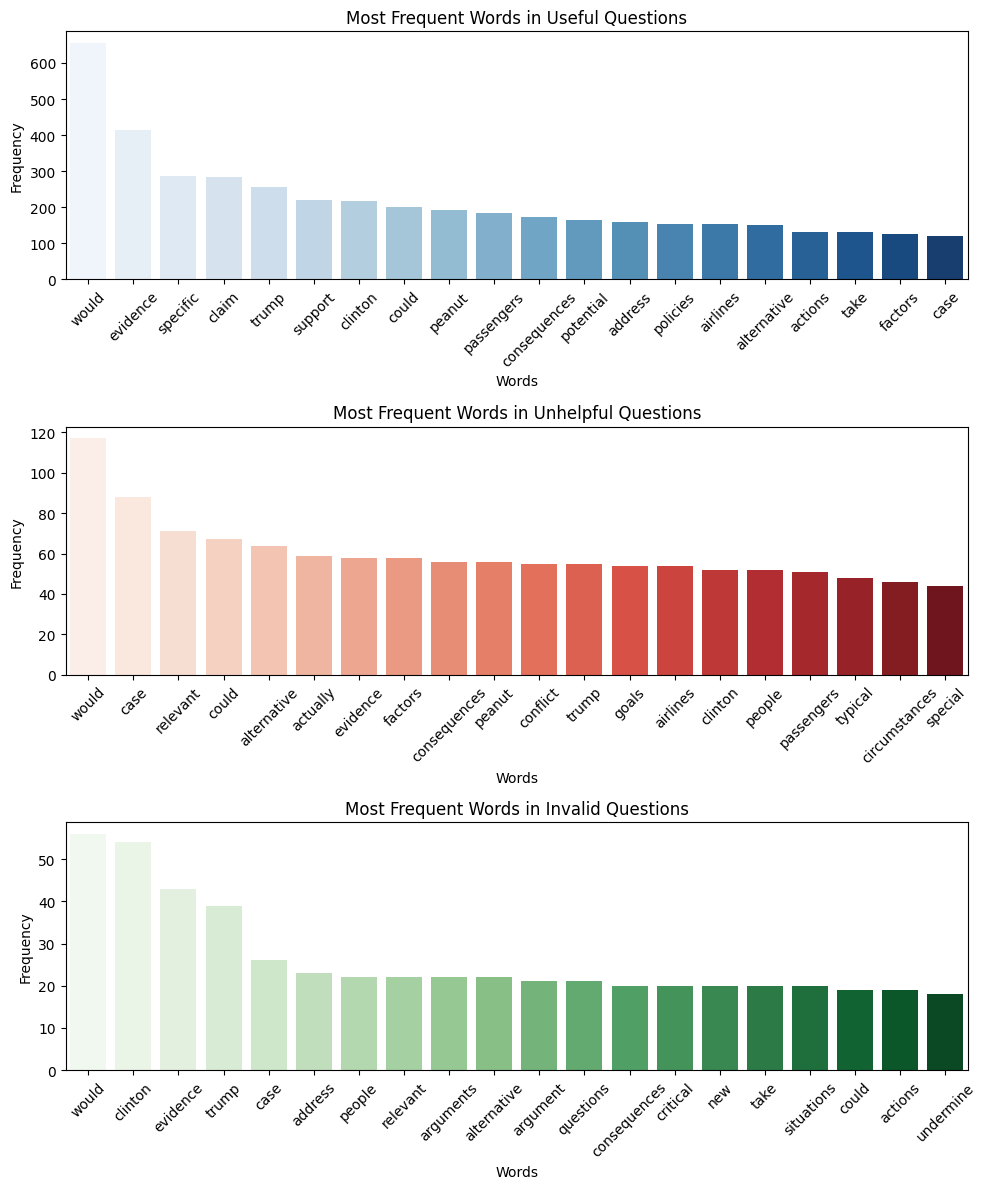

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if needed
nltk.download("stopwords")

# Load stopwords
stop_words = set(stopwords.words("english"))


# Function to get most common words after removing stopwords
def get_most_common_words(df, column, n=20):
    all_words = []
    for text in df[column].dropna():
        filtered_words = [word.lower() for word in str(text).split() if word.lower() not in stop_words and word.isalpha()]
        all_words.extend(filtered_words)
    return Counter(all_words).most_common(n)

# Get common words in each class without stopwords
common_words_useful = get_most_common_words(df_preprocessed[df_preprocessed["label"] == "Useful"], "question")
common_words_unhelpful = get_most_common_words(df_preprocessed[df_preprocessed["label"] == "Unhelpful"], "question")
common_words_invalid = get_most_common_words(df_preprocessed[df_preprocessed["label"] == "Invalid"], "question")

# Convert to DataFrame for visualization
df_common_words = pd.DataFrame({
    "Useful": [w[0] for w in common_words_useful],
    "Useful_Count": [w[1] for w in common_words_useful],
    "Unhelpful": [w[0] for w in common_words_unhelpful],
    "Unhelpful_Count": [w[1] for w in common_words_unhelpful],
    "Invalid": [w[0] for w in common_words_invalid],
    "Invalid_Count": [w[1] for w in common_words_invalid]
})

# Plot separate bar charts for each class
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Define class names and their respective data
classes = ["Useful", "Unhelpful", "Invalid"]
counts = ["Useful_Count", "Unhelpful_Count", "Invalid_Count"]
colors = ["Blues", "Reds", "Greens"]

for i, class_name in enumerate(classes):
    class_df = df_common_words[[class_name, counts[i]]].dropna()
    sns.barplot(data=class_df, x=class_name, y=counts[i], palette=colors[i], ax=axes[i])

    # Improve readability
    axes[i].set_title(f"Most Frequent Words in {class_name} Questions")
    axes[i].set_xlabel("Words")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\maria\AppData\Local\Temp\ipykernel_3196\4035080106.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_word_overlap["Class"], y=df_word_overlap["Avg_Word_Overlap"], palette="coolwarm")


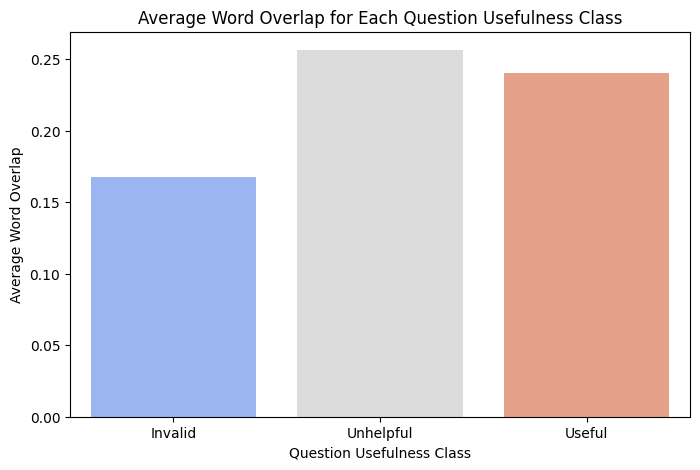

In [9]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to calculate how much of a question comes from its intervention after removing stop words
def get_word_overlap(row):
    intervention_words = {word for word in row["intervention"].lower().split() if word not in stop_words}
    question_words = {word for word in row["question"].lower().split() if word not in stop_words}
    # Ensure denominator is not zero
    return len(intervention_words & question_words) / len(question_words) if question_words else 0

# Apply word matching to your preprocessed DataFrame
df_preprocessed["word_overlap"] = df_preprocessed.apply(get_word_overlap, axis=1)

# Compute average overlap per class
df_word_overlap = df_preprocessed.groupby("label")["word_overlap"].mean().reset_index()
df_word_overlap.columns = ["Class", "Avg_Word_Overlap"]

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=df_word_overlap["Class"], y=df_word_overlap["Avg_Word_Overlap"], palette="coolwarm")

# Add labels and title
plt.xlabel("Question Usefulness Class")
plt.ylabel("Average Word Overlap")
plt.title("Average Word Overlap for Each Question Usefulness Class")

# Show the plot
plt.show()


✍🏻 the average overlap of words is not a differentiating feature 

### `Topics closeness and Q&A closeness`

In [10]:
# Filter out only useful questions
useful_questions_df = df_preprocessed[df_preprocessed['label'] == 'Useful']


## `Type of intervention Classifier`
- tried sentenceBERT accuracy dropped to 51%

Test accuracy: 0.675704989154013
F1 Score: 0.6034706660759409
Confusion Matrix:
 [[ 10  13  77]
 [  5  41 181]
 [  2  21 572]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.10      0.17       100
           1       0.55      0.18      0.27       227
           2       0.69      0.96      0.80       595

    accuracy                           0.68       922
   macro avg       0.61      0.41      0.42       922
weighted avg       0.64      0.68      0.60       922



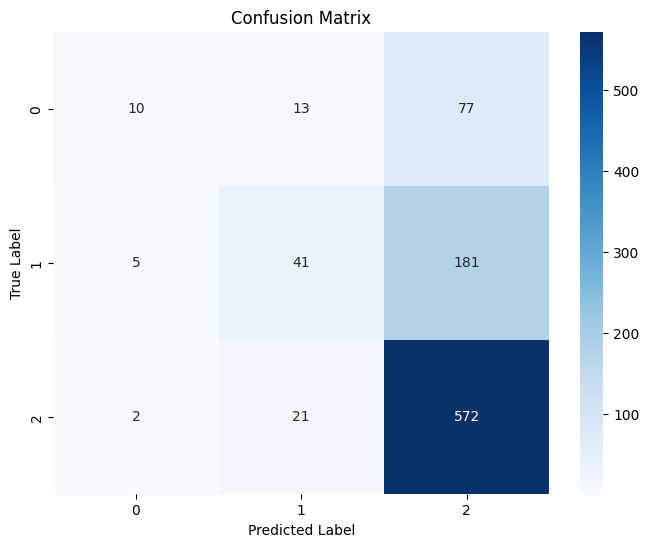

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit

# Suppose your DataFrame 'df_preprocessed' has the following columns:
# 'intervention', 'question', 'bm25_similarity', 'word_overlap', and 'label_numeric'

# Build a preprocessor that creates separate TF-IDF features for both texts and passes through numeric features
preprocessor = ColumnTransformer([
    ('intervention_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'intervention'),
    ('question_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'question'),
    ('bm25', 'passthrough', ['bm25_similarity']),
    ('word_overlap', 'passthrough', ['word_overlap'])
])

# Create the overall pipeline that processes the features and then fits a classifier
pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Prepare the features and labels
X = df_preprocessed[['intervention', 'question', 'bm25_similarity', 'word_overlap']]
y = df_preprocessed['label_numeric']

# Split the data into training and testing sets for evaluation
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = (lambda idx: (X.iloc[idx[0]], X.iloc[idx[1]], y.iloc[idx[0]], y.iloc[idx[1]]))(
    next(GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y, groups=df_preprocessed['intervention'])))

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set (accuracy)
accuracy = pipeline.score(X_test, y_test)
print("Test accuracy:", accuracy)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute F1 score (weighted to account for class imbalance)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print the classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


 {"Useful": 2, "Unhelpful": 1, "Invalid": 0}
### summary
- strengths
The model performs very well on class 2 (majority class) with high recall (0.94) and a strong F1 score (0.83).

- Weaknesses:
The model struggles with classes 0 and 1, as evidenced by their low recall (0.26 and 0.25) and F1 scores (0.37 and 0.35). This means many instances of these classes are not being correctly identified.

- Overall 
While the overall accuracy is 72%, the imbalance in performance indicates that the classifier is likely biased toward the majority class. To improve the performance on the minority classes, you might consider techniques such as class weighting, oversampling the minority classes, or using more advanced models/feature engineering.

SVM Classifier
Test Accuracy: 0.6691973969631236
F1 Score: 0.611397607002314
Confusion Matrix:
 [[ 15  17  68]
 [  6  47 174]
 [  2  38 555]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.15      0.24       100
           1       0.46      0.21      0.29       227
           2       0.70      0.93      0.80       595

    accuracy                           0.67       922
   macro avg       0.60      0.43      0.44       922
weighted avg       0.63      0.67      0.61       922



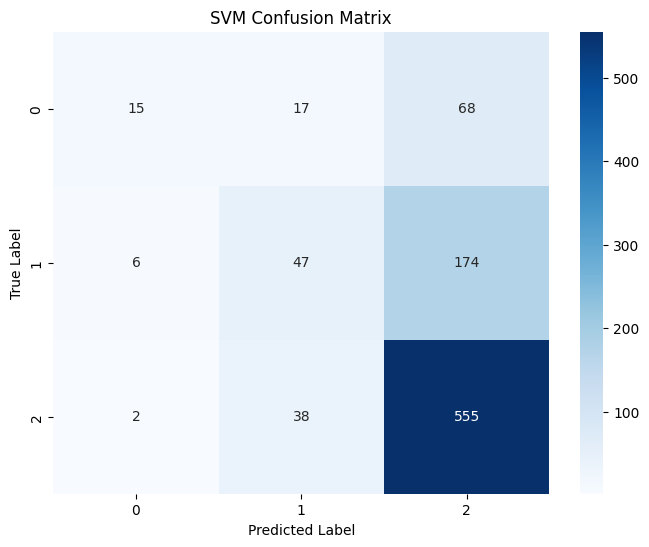

Decision Tree Classifier
Test Accuracy: 0.5639913232104121
F1 Score: 0.5588930336663152
Confusion Matrix:
 [[ 20  31  49]
 [ 28  66 133]
 [ 45 116 434]]

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.20      0.21       100
           1       0.31      0.29      0.30       227
           2       0.70      0.73      0.72       595

    accuracy                           0.56       922
   macro avg       0.41      0.41      0.41       922
weighted avg       0.55      0.56      0.56       922



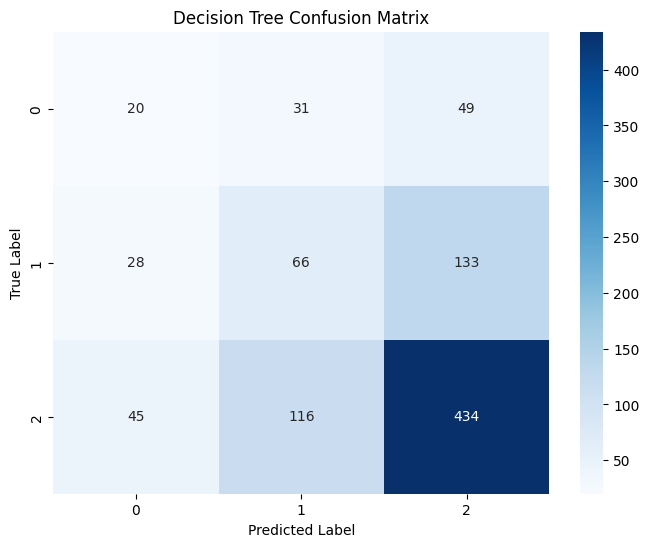

In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your DataFrame 'df_preprocessed' has the following columns:
# 'intervention', 'question', 'bm25_similarity', 'word_overlap', and 'label_numeric'

# Build a preprocessor that creates separate TF-IDF features for both texts and passes through numeric features
preprocessor = ColumnTransformer([
    ('intervention_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'intervention'),
    ('question_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'question'),
    ('bm25', 'passthrough', ['bm25_similarity']),
    ('word_overlap', 'passthrough', ['word_overlap'])
])

# Prepare the features and labels
X = df_preprocessed[['intervention', 'question', 'bm25_similarity', 'word_overlap']]
y = df_preprocessed['label_numeric']

# Split the data into training and testing sets for evaluation
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = (lambda idx: (X.iloc[idx[0]], X.iloc[idx[1]], y.iloc[idx[0]], y.iloc[idx[1]]))(
    next(GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y, groups=df_preprocessed['intervention'])))

# -----------------------
# SVM Classifier Pipeline
# -----------------------
svm_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', SVC(kernel='linear'))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Evaluate SVM on the test set
svm_accuracy = svm_pipeline.score(X_test, y_test)
svm_y_pred = svm_pipeline.predict(X_test)
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("SVM Classifier")
print("Test Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1)
print("Confusion Matrix:\n", svm_cm)
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

# -------------------------------
# Decision Tree Classifier Pipeline
# -------------------------------
dt_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Evaluate Decision Tree on the test set
dt_accuracy = dt_pipeline.score(X_test, y_test)
dt_y_pred = dt_pipeline.predict(X_test)
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_cm = confusion_matrix(y_test, dt_y_pred)

print("Decision Tree Classifier")
print("Test Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print("Confusion Matrix:\n", dt_cm)
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


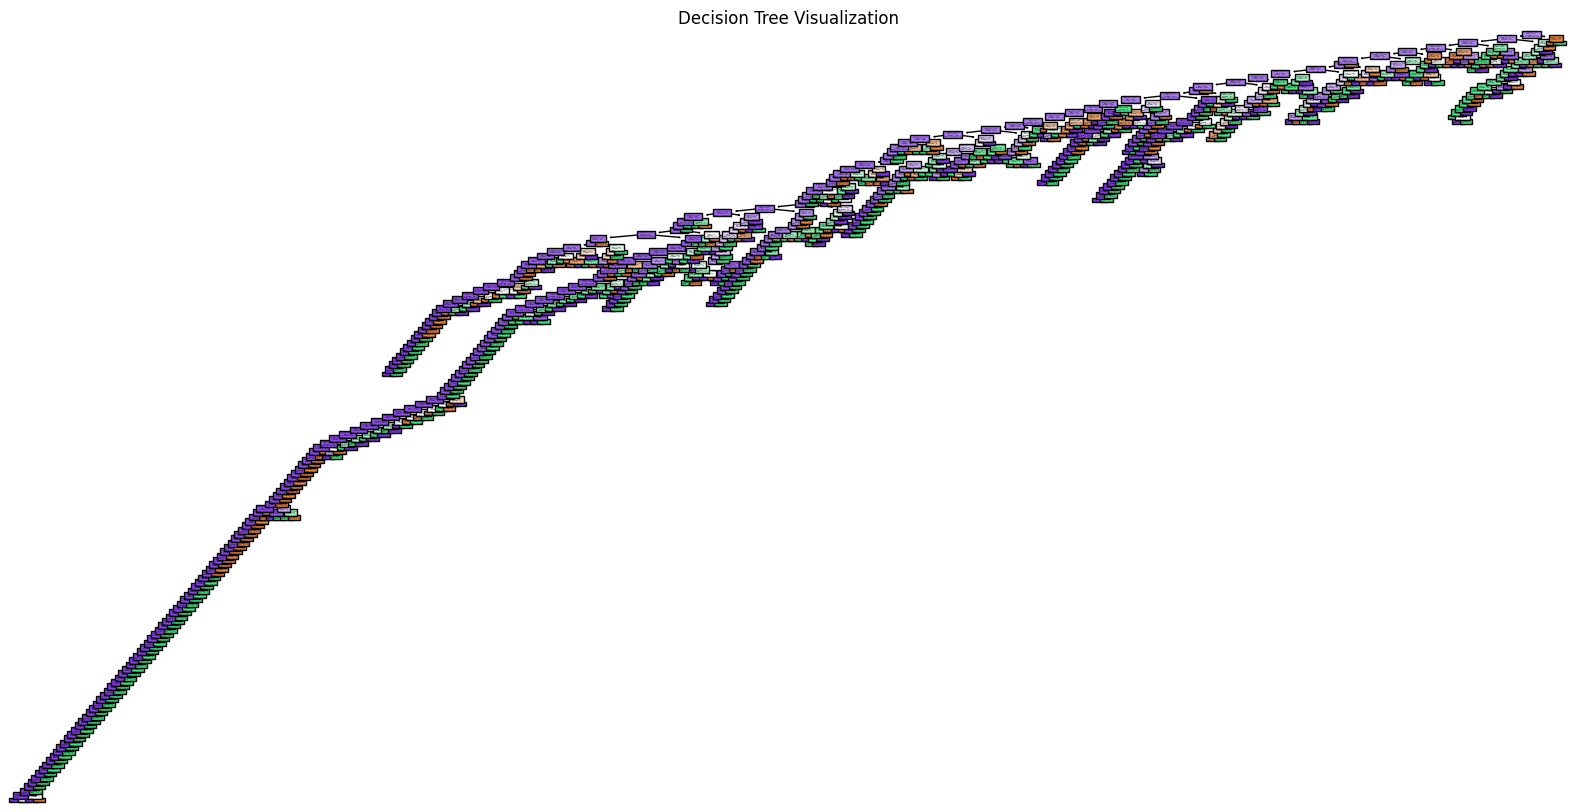

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract the Decision Tree classifier from the pipeline
dt_model = dt_pipeline.named_steps['clf']

# Plot the decision tree structure
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [14]:
print("Depth of the tree:", dt_model.get_depth())
print("Number of leaves:", dt_model.get_n_leaves())


Depth of the tree: 176
Number of leaves: 574


In [15]:
import numpy as np

num_nodes = dt_model.tree_.node_count
values = dt_model.tree_.value  # shape: [num_nodes, 1, n_classes]

for node_id in range(num_nodes):
    class_distribution = values[node_id][0]
    total_samples = np.sum(class_distribution)
    print(f"Node {node_id}: Class distribution = {class_distribution}, Total samples = {total_samples}")


Node 0: Class distribution = [ 353.  666. 2195.], Total samples = 3214.0
Node 1: Class distribution = [ 334.  665. 2195.], Total samples = 3194.0
Node 2: Class distribution = [ 321.  615. 2163.], Total samples = 3099.0
Node 3: Class distribution = [ 315.  587. 2156.], Total samples = 3058.0
Node 4: Class distribution = [ 293.  587. 2150.], Total samples = 3030.0
Node 5: Class distribution = [ 279.  586. 2149.], Total samples = 3014.0
Node 6: Class distribution = [ 271.  559. 2136.], Total samples = 2966.0
Node 7: Class distribution = [ 261.  559. 2136.], Total samples = 2956.0
Node 8: Class distribution = [ 244.  559. 2125.], Total samples = 2928.0
Node 9: Class distribution = [ 236.  523. 2092.], Total samples = 2851.0
Node 10: Class distribution = [ 236.  503. 2081.], Total samples = 2820.0
Node 11: Class distribution = [ 235.  494. 2081.], Total samples = 2810.0
Node 12: Class distribution = [ 219.  480. 2064.], Total samples = 2763.0
Node 13: Class distribution = [ 213.  480. 2064.

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


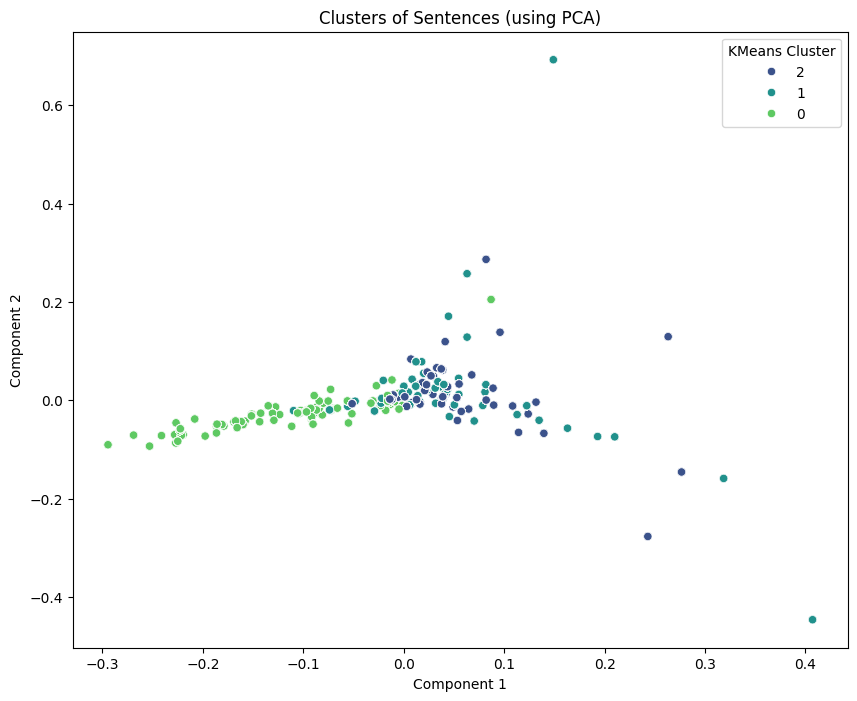

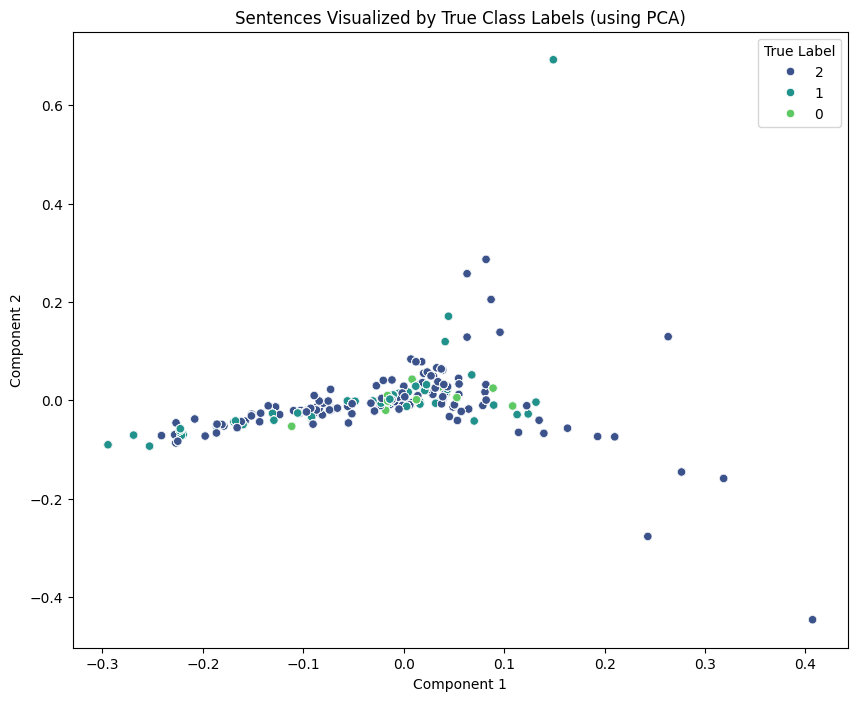

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_preprocessed has your data and at least the following columns:
# 'intervention', 'label_numeric'
# You can replace 'intervention' with another text column if needed.

# -------------------------
# 1. Compute TF-IDF Features
# -------------------------
text_data = df_preprocessed['intervention']
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# -------------------------
# 2. Cluster the Sentences
# -------------------------
# You can set the number of clusters equal to the number of unique classes
n_clusters = df_preprocessed['label_numeric'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Add the cluster labels to the DataFrame for later comparison
df_preprocessed['cluster'] = clusters

# -------------------------
# 3. Dimensionality Reduction for Visualization
# -------------------------
# Option A: Using PCA
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# Option B: Using t-SNE (uncomment if you prefer t-SNE)
# tsne = TSNE(n_components=2, random_state=42)
# X_reduced = tsne.fit_transform(X_tfidf.toarray())

# -------------------------
# 4. Visualization
# -------------------------
# Plotting clusters (as determined by KMeans)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=df_preprocessed['cluster'].astype(str), 
                palette="viridis", legend="full")
plt.title("Clusters of Sentences (using PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="KMeans Cluster")
plt.show()

# Plotting using the actual class labels to see if they form distinguishable clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=df_preprocessed['label_numeric'].astype(str), 
                palette="viridis", legend="full")
plt.title("Sentences Visualized by True Class Labels (using PCA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="True Label")
plt.show()


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


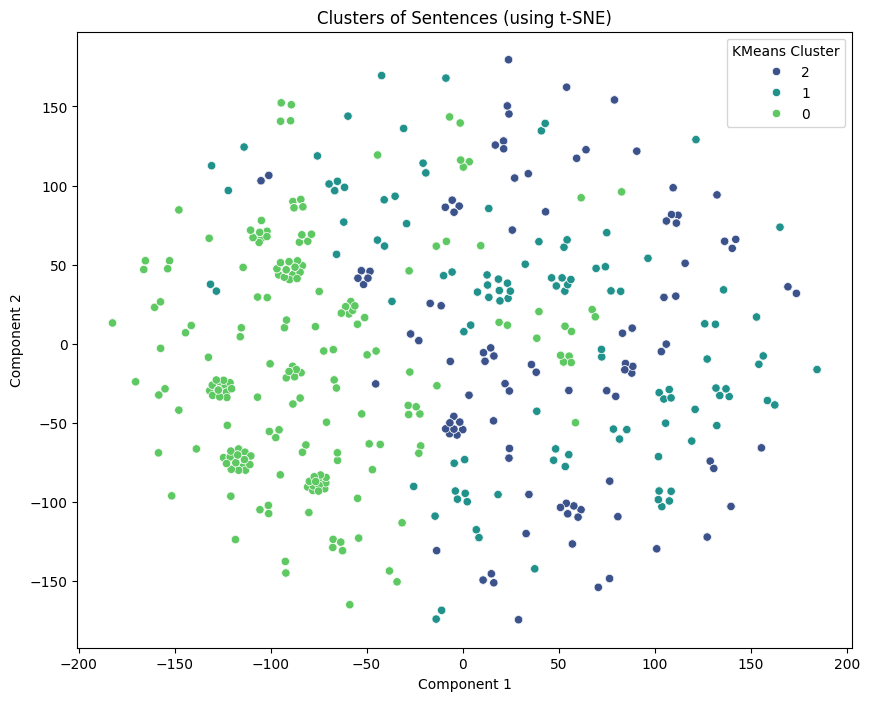

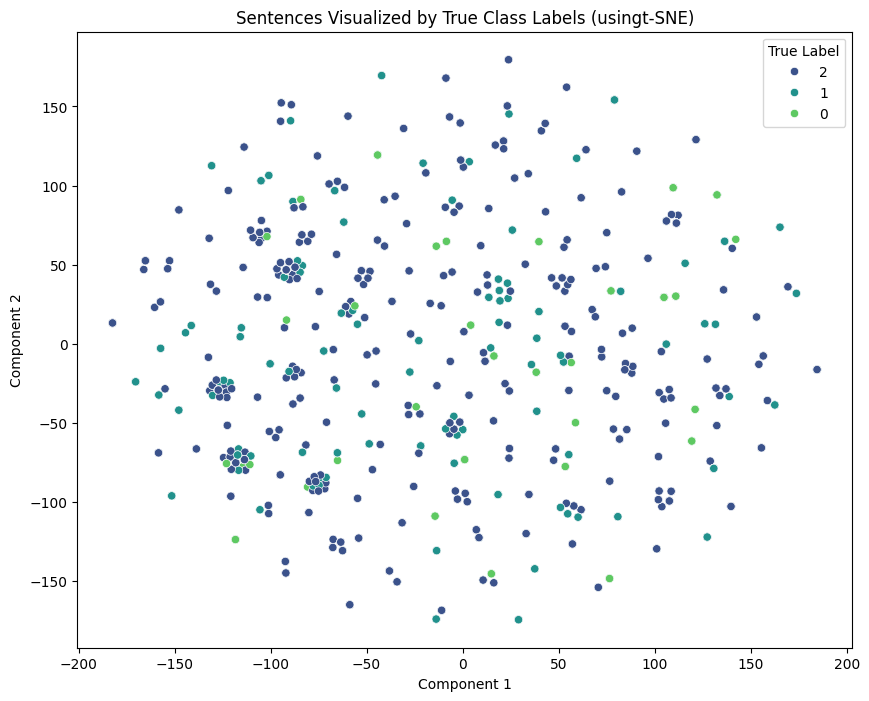

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_preprocessed has your data and at least the following columns:
# 'intervention', 'label_numeric'
# You can replace 'intervention' with another text column if needed.

# -------------------------
# 1. Compute TF-IDF Features
# -------------------------
text_data = df_preprocessed['intervention']
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# -------------------------
# 2. Cluster the Sentences
# -------------------------
# You can set the number of clusters equal to the number of unique classes
n_clusters = df_preprocessed['label_numeric'].nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Add the cluster labels to the DataFrame for later comparison
df_preprocessed['cluster'] = clusters

# -------------------------
# 3. Dimensionality Reduction for Visualization
# -------------------------
# Option A: Using PCA
# pca = PCA(n_components=2, random_state=42)
# X_reduced = pca.fit_transform(X_tfidf.toarray())

# Option B: Using t-SNE (uncomment if you prefer t-SNE)
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_tfidf.toarray())

# -------------------------
# 4. Visualization
# -------------------------
# Plotting clusters (as determined by KMeans)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=df_preprocessed['cluster'].astype(str), 
                palette="viridis", legend="full")
plt.title("Clusters of Sentences (using t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="KMeans Cluster")
plt.show()

# Plotting using the actual class labels to see if they form distinguishable clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=df_preprocessed['label_numeric'].astype(str), 
                palette="viridis", legend="full")
plt.title("Sentences Visualized by True Class Labels (usingt-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="True Label")
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

def get_span_embedding(span, model):
    """
    Compute an embedding for a span (list of tokens) by averaging the embeddings
    of each token in the span.
    """
    # Encode each token in the span
    token_embeddings = model.encode(span)
    # Compute the average embedding
    avg_embedding = np.mean(token_embeddings, axis=0)
    return avg_embedding

def cosine_similarity(a, b):
    """
    Compute cosine similarity between two vectors a and b.
    """
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def extract_best_span(intervention, question, model, threshold=0, window_size=2):
    """
    Given an intervention and a question, split the intervention into sliding windows
    of window_size tokens, compute the cosine similarity between each span's embedding 
    and the question embedding, and return the best span and its similarity.
    
    If the maximum similarity is below threshold, best span is returned as None.
    """
    # Use a simple split; consider using a more robust tokenizer if needed.
    tokens = intervention.split()
    spans = []
    if len(tokens) < window_size:
        # If there are fewer tokens than the window size, use all tokens as one span.
        spans.append(tokens)
    else:
        # Create sliding windows of 3 tokens
        for i in range(len(tokens) - window_size + 1):
            span = tokens[i:i + window_size]
            spans.append(span)
    
    # Encode the question as a single embedding
    question_embedding = model.encode(question)
    
    max_similarity = -1
    best_span = None
    for span in spans:
        span_embedding = get_span_embedding(span, model)
        sim = cosine_similarity(span_embedding, question_embedding)
        if sim > max_similarity:
            max_similarity = sim
            best_span = span
    
    # Apply threshold: if the best similarity is below the threshold, return None for best_span.
    # if max_similarity < threshold:
    #     best_span = None
    # else:
    best_span = " ".join(best_span)  # Convert list of tokens to a string
    
    return best_span, max_similarity

# Load the SentenceBERT model (this might take a moment)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example DataFrame; replace with your actual DataFrame containing 'intervention' and 'question'
# df = pd.read_csv('your_data.csv')
# For demonstration, here's a sample DataFrame:


# Process each row to compute best_span and max_similarity
def process_row(row):
    best_span, max_sim = extract_best_span(row['intervention'], row['question'], model, threshold=0.5, window_size=3)
    return pd.Series({"best_span": best_span, "max_similarity": max_sim})

df_preprocessed[['best_span', 'max_similarity']] = df_preprocessed.apply(process_row, axis=1)


c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
df_preprocessed

,intervention,question,label,schemes,intervention_tokens,intervention_pos,intervention_ner,intervention_dependencies,question_tokens,question_pos,question_ner,question_dependencies,question_word_count,question_char_count,label_numeric,bm25_similarity,word_overlap,cluster,best_span,max_similarity
0,"CLINTON: ""which may prove to be an intelligenc...",Is the current political situation actually a ...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[Is, the, current, political, situation, actua...","[(Is, AUX), (the, DET), (current, ADJ), (polit...","[(NATO, ORG)]","[(Is, ROOT, Is), (the, det, situation), (curre...",30,188,2,22.899070,0.133333,2,"working with NATO,",0.283128
1,"CLINTON: ""which may prove to be an intelligenc...",What are the potential drawbacks or risks of i...,Unhelpful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, are, the, potential, drawbacks, or, ris...","[(What, PRON), (are, AUX), (the, DET), (potent...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, are), (are, ROOT, are), (the, de...",24,146,1,32.650237,0.333333,2,cooperating with Muslim,0.272805
2,"CLINTON: ""which may prove to be an intelligenc...",What evidence is there that Donald Trump's rhe...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, evidence, is, there, that, Donald, Trum...","[(What, DET), (evidence, NOUN), (is, AUX), (th...","[(Donald Trump's, PERSON), (Muslim, NORP), (Cl...","[(What, det, evidence), (evidence, attr, is), ...",33,186,2,45.428358,0.357143,2,"of Donald's rhetoric,",0.284456
3,"CLINTON: ""which may prove to be an intelligenc...","How does Clinton define ""working more closely""...",Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[How, does, Clinton, define, "", working, more,...","[(How, SCONJ), (does, AUX), (Clinton, PROPN), ...","[(Clinton, PERSON)]","[(How, advmod, define), (does, aux, define), (...",26,139,2,12.518041,0.083333,2,working cooperation with,0.288727
4,"CLINTON: ""which may prove to be an intelligenc...",What is the evidence that Muslim communities a...,Useful,"CauseToEffect, PracticalReasoning, Consequence...","[CLINTON, :, "", which, may, prove, to, be, an,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (wh...","[(Europe, LOC), (the Middle East, LOC), (Donal...","[(CLINTON, ROOT, CLINTON), (:, punct, CLINTON)...","[What, is, the, evidence, that, Muslim, commun...","[(What, PRON), (is, AUX), (the, DET), (evidenc...","[(Muslim, NORP), (Clinton, PERSON)]","[(What, attr, is), (is, ROOT, is), (the, det, ...",35,184,2,28.969901,0.142857,2,"Muslims abroad, Muslims",0.293345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,"CLINTON: ""let me start by saying , words matte...","How does Clinton's assertion that ""our word is...",Useful,"PositionToKnow, Example, Values","[CLINTON, :, "", let, me, start, by, saying, ,,...","[(CLINTON, PROPN), (:, PUNCT), ("", PUNCT), (le...","[(Japan, GPE), (South Korea, GPE), (America, G...","[(CLINTON, dep, let), (:, punct, CLINTON), ("",...","[How, does, Clinton, 's, assertion, that, "", o...","[(How, SCONJ), (does, VERB), (Clinton, PROPN),...","[(Clinton, 

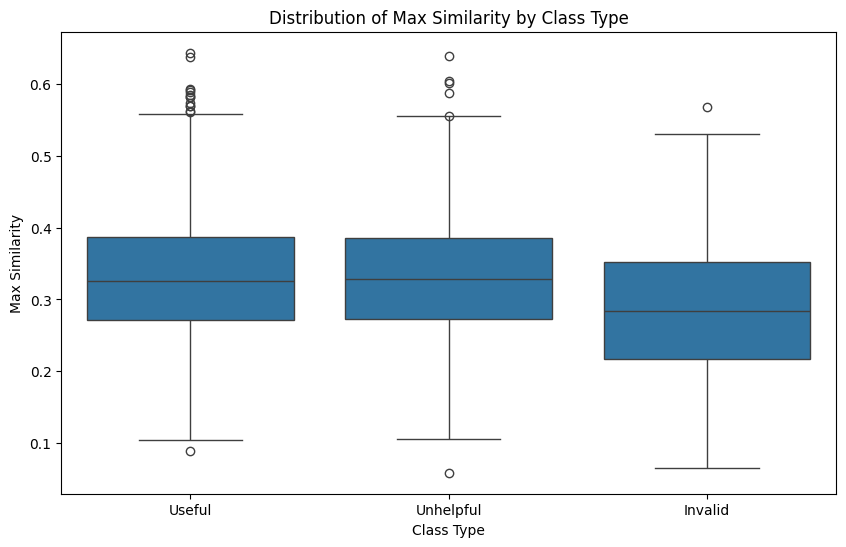

Group Statistics:
                 mean       std  count
class_type                           
Invalid     0.288060  0.097401    453
Unhelpful   0.330680  0.085629    893
Useful      0.331424  0.083302   2790
ANOVA Results:
                   sum_sq      df         F        PR(>F)
C(class_type)   0.752641     2.0  51.53183  7.843303e-23
Residual       30.181962  4133.0       NaN           NaN


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: suppose df is your DataFrame with columns 'class_type' and 'max_similarity'
# If your class type column is named differently, adjust accordingly.
# For demonstration, let's assume it's in df['label'] and convert it to a string if needed.
df_preprocessed['class_type'] = df_preprocessed['label'].astype(str)

# 1. Visualization: Create a boxplot to see the distribution of max_similarity for each class type.
plt.figure(figsize=(10, 6))
sns.boxplot(x='class_type', y='max_similarity', data=df_preprocessed)
plt.title("Distribution of Max Similarity by Class Type")
plt.xlabel("Class Type")
plt.ylabel("Max Similarity")
plt.show()

# 2. Group Statistics: Compute summary statistics for each class type.
group_stats = df_preprocessed.groupby('class_type')['max_similarity'].agg(['mean', 'std', 'count'])
print("Group Statistics:\n", group_stats)

# 3. Statistical Test: Use ANOVA to determine if the differences between class groups are significant.
#    Here we fit an OLS model with max_similarity as the dependent variable and class type as the independent variable.
model = ols('max_similarity ~ C(class_type)', data=df_preprocessed).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:\n", anova_table)


**Summary:**  
The mean max_similarity values for the three classes (Invalid, Unhelpful, Useful) are quite close, and an ANOVA test (p ≈ 0.15) indicates no statistically significant difference among them. In other words, **max_similarity does not vary meaningfully across these class types** based on the current data.

In [22]:
df_preprocessed.to_csv('df_processed.csv', index=False)

### If the classes are balanced will this improve classification?

SVM Classifier
Test Accuracy: 0.5019011406844106
F1 Score: 0.4982417095077159
Confusion Matrix:
 [[33 27 21]
 [16 39 33]
 [ 9 25 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.41      0.47        81
           1       0.43      0.44      0.44        88
           2       0.53      0.64      0.58        94

    accuracy                           0.50       263
   macro avg       0.51      0.50      0.50       263
weighted avg       0.51      0.50      0.50       263



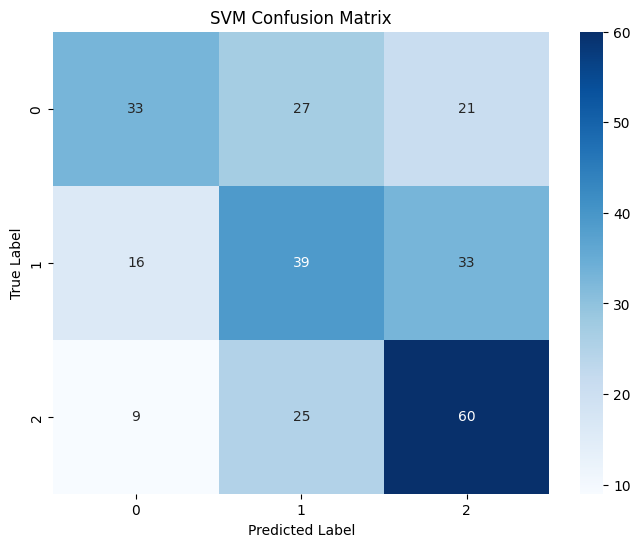

Decision Tree Classifier
Test Accuracy: 0.40304182509505704
F1 Score: 0.4020774138411878
Confusion Matrix:
 [[27 23 31]
 [20 34 34]
 [32 17 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.34        81
           1       0.46      0.39      0.42        88
           2       0.41      0.48      0.44        94

    accuracy                           0.40       263
   macro avg       0.40      0.40      0.40       263
weighted avg       0.41      0.40      0.40       263



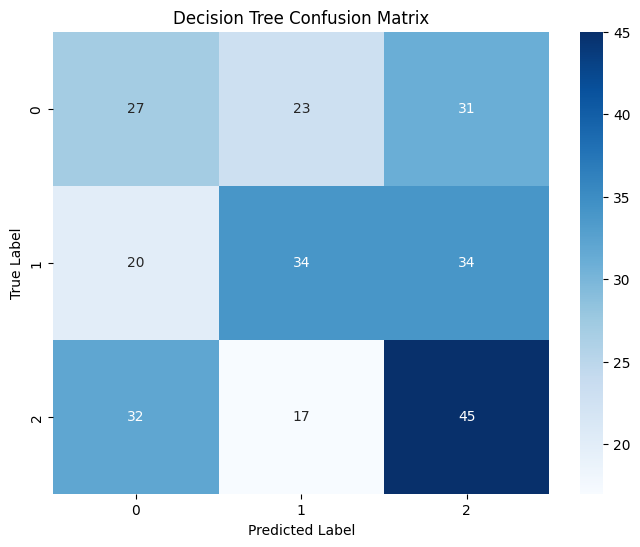

In [34]:
# Balance the classes
# 1. Separate the classes

class_0 = df_preprocessed[df_preprocessed["label_numeric"] == 0]
class_1 = df_preprocessed[df_preprocessed["label_numeric"] == 1]
class_2 = df_preprocessed[df_preprocessed["label_numeric"] == 2]

# 2. Find the smallest class size
min_size = min(len(class_0), len(class_1), len(class_2))

# 3. Randomly sample from each class
class_0_balanced = class_0.sample(min_size, random_state=42)
class_1_balanced = class_1.sample(min_size, random_state=42)
class_2_balanced = class_2.sample(min_size, random_state=42)

# 4. Concatenate them into a new balanced dataframe
df_balanced = pd.concat([class_0_balanced, class_1_balanced, class_2_balanced])

# 5. (Optional) Shuffle the new dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


# Run the best classifier 

# Suppose your DataFrame 'df_preprocessed' has the following columns:
# 'intervention', 'question', 'bm25_similarity', 'word_overlap', and 'label_numeric'

# Build a preprocessor that creates separate TF-IDF features for both texts and passes through numeric features
preprocessor = ColumnTransformer([
    ('intervention_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'intervention'),
    ('question_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'question'),
    ('bm25', 'passthrough', ['bm25_similarity']),
    ('word_overlap', 'passthrough', ['word_overlap'])
])

# Prepare the features and labels
X = df_balanced[['intervention', 'question', 'bm25_similarity', 'word_overlap']]
y = df_balanced['label_numeric']

# Split the data into training and testing sets for evaluation
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = (lambda idx: (X.iloc[idx[0]], X.iloc[idx[1]], y.iloc[idx[0]], y.iloc[idx[1]]))(
    next(GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y, groups=df_balanced['intervention'])))

# -----------------------
# SVM Classifier Pipeline
# -----------------------
svm_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', SVC(kernel='linear'))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Evaluate SVM on the test set
svm_accuracy = svm_pipeline.score(X_test, y_test)
svm_y_pred = svm_pipeline.predict(X_test)
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("SVM Classifier")
print("Test Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1)
print("Confusion Matrix:\n", svm_cm)
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

# -------------------------------
# Decision Tree Classifier Pipeline
# -------------------------------
dt_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Evaluate Decision Tree on the test set
dt_accuracy = dt_pipeline.score(X_test, y_test)
dt_y_pred = dt_pipeline.predict(X_test)
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_cm = confusion_matrix(y_test, dt_y_pred)

print("Decision Tree Classifier")
print("Test Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print("Confusion Matrix:\n", dt_cm)
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


### What if we made it into two classes?

SVM Classifier
Test Accuracy: 0.6516129032258065
F1 Score: 0.646876230711396
Confusion Matrix:
 [[26 30]
 [24 75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49        56
           1       0.71      0.76      0.74        99

    accuracy                           0.65       155
   macro avg       0.62      0.61      0.61       155
weighted avg       0.64      0.65      0.65       155



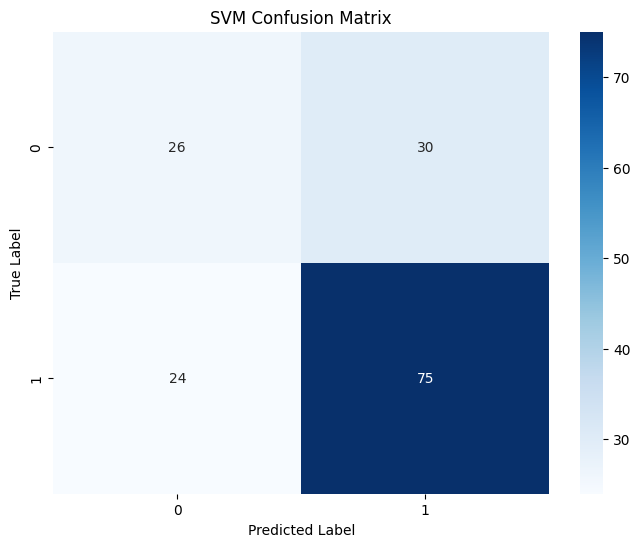

Decision Tree Classifier
Test Accuracy: 0.535483870967742
F1 Score: 0.5445835339431874
Confusion Matrix:
 [[31 25]
 [47 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.55      0.46        56
           1       0.68      0.53      0.59        99

    accuracy                           0.54       155
   macro avg       0.54      0.54      0.53       155
weighted avg       0.57      0.54      0.54       155



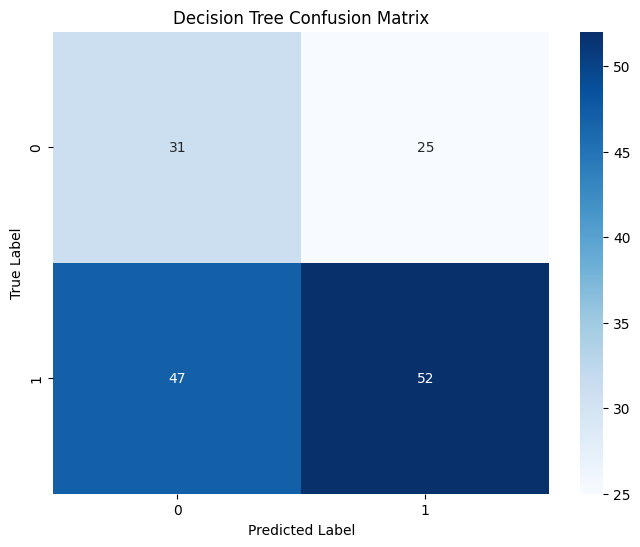

In [35]:
# make it only two classes
df_binary = df_preprocessed.copy()
df_binary["label_numeric"] = df_binary["label_numeric"].replace(2, 1)


class_0 = df_binary[df_binary["label_numeric"] == 0]
class_1 = df_binary[df_binary["label_numeric"] == 1]

# 2. Find the smallest class size
min_size = min(len(class_0), len(class_1), len(class_2))

# 3. Randomly sample from each class
class_0_balanced = class_0.sample(min_size, random_state=42)
class_1_balanced = class_1.sample(min_size, random_state=42)

# 4. Concatenate them into a new balanced dataframe
df_balanced_binary = pd.concat([class_0_balanced, class_1_balanced])

# 5. (Optional) Shuffle the new dataframe
df_balanced_binary = df_balanced_binary.sample(frac=1, random_state=42).reset_index(drop=True)



# Run best classifier

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your DataFrame 'df_preprocessed' has the following columns:
# 'intervention', 'question', 'bm25_similarity', 'word_overlap', and 'label_numeric'

# Build a preprocessor that creates separate TF-IDF features for both texts and passes through numeric features
preprocessor = ColumnTransformer([
    ('intervention_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'intervention'),
    ('question_tfidf', TfidfVectorizer(ngram_range=(1, 2), stop_words='english'), 'question'),
    ('bm25', 'passthrough', ['bm25_similarity']),
    ('word_overlap', 'passthrough', ['word_overlap'])
])

# Prepare the features and labels
X = df_balanced_binary[['intervention', 'question', 'bm25_similarity', 'word_overlap']]
y = df_balanced_binary['label_numeric']

# Split the data into training and testing sets for evaluation
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = (lambda idx: (X.iloc[idx[0]], X.iloc[idx[1]], y.iloc[idx[0]], y.iloc[idx[1]]))(
    next(GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y, groups=df_balanced_binary['intervention'])))

# -----------------------
# SVM Classifier Pipeline
# -----------------------
svm_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', SVC(kernel='linear'))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Evaluate SVM on the test set
svm_accuracy = svm_pipeline.score(X_test, y_test)
svm_y_pred = svm_pipeline.predict(X_test)
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("SVM Classifier")
print("Test Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1)
print("Confusion Matrix:\n", svm_cm)
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

# -------------------------------
# Decision Tree Classifier Pipeline
# -------------------------------
dt_pipeline = Pipeline([
    ('features', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Evaluate Decision Tree on the test set
dt_accuracy = dt_pipeline.score(X_test, y_test)
dt_y_pred = dt_pipeline.predict(X_test)
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_cm = confusion_matrix(y_test, dt_y_pred)

print("Decision Tree Classifier")
print("Test Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print("Confusion Matrix:\n", dt_cm)
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()
